# SoftKMeans
Using Python and Numpy, write a class named SoftKMeans with necessary methods, which implements the soft K-means method for clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class SoftKMeans:
    def __init__(self,k,max_iter,beta=0.01):
        self.beta=beta
        self.k=k
        self.max_iter=max_iter
        
    def init_center(self, X):
        n, _ = X.shape
        center = np.zeros((self.k, X.shape[1]))
        idx = np.random.choice(n)
        center[0] = X[idx]
        for i in range(1, self.k):
            D = np.min([np.linalg.norm(X - c, axis=1)**2 for c in center[:i]], axis=0)
            probs = D / np.sum(D)
            idx = np.random.choice(n, p=probs)
            center[i] = X[idx]
        return center
        
    def train(self,X,plot=False):
        losses=[]
        n,_=X.shape
        self.center=self.init_center(X)
        for _ in range (self.max_iter):
            last_center=self.center
            self.r=np.zeros([n,self.k])
            for j in range(n):
                self.cluster(self.r[j],X[j])
            self.move_center(self.r,X)
            losses.append(self.loss(X))
            print('Iteration: ',_,'loss: ', self.loss(X))
            if np.sum((last_center-self.center)**2)==0:
                break
        self.labels=np.argmax(self.r,axis=1)
        if plot:
            self.plot_cluster(X)
        iter=np.arange(len(losses))
        plt.plot(iter,losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        title='Loss Curve, k= '+str(self.k)
        plt.title(title)
        plt.grid()
        plt.show()
        
        
    def distance(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    
    def cluster(self,r,x):
        dis=np.empty(self.k)
        for i in range(self.k):
            dis[i]=self.distance(x,self.center[i])
        den=np.sum(np.exp(-self.beta*dis))
        for i in range(self.k):
            r[i]=np.exp(-self.beta*dis[i])/den
    
    def move_center(self,r,X):
        self.center=np.dot(r.T,X)/np.sum(r,axis=0).reshape(-1,1)
        
    def plot_cluster(self, X):
        colors = ['orange', 'blue', 'green', 'red', 'purple', 'yellow', 'brown', 'pink', 'gray', 'olive'] 
        for i in range(self.k):
            plt.scatter(X[self.labels == i, 0], X[self.labels == i, 1], c=colors[i], label='Cluster {}'.format(i))
        plt.scatter(self.center[:,0], self.center[:,1], c='black', marker='x', label='Centroids')
        plt.legend()
        plt.show()
    
    def loss(self,X):
        n=X.shape[0]
        loss=0
        for i in range(n):
            for j in range(self.k):
                loss+=self.r[i,j]*self.distance(X[i],self.center[j])
        return loss

Iteration:  0 loss:  1096.6020272036146
Iteration:  1 loss:  1088.9905136214068
Iteration:  2 loss:  1089.3452887313297
Iteration:  3 loss:  1089.7736992901366
Iteration:  4 loss:  1090.2419275027587
Iteration:  5 loss:  1090.7605494004947
Iteration:  6 loss:  1091.360309743488
Iteration:  7 loss:  1092.0953770588856
Iteration:  8 loss:  1093.0567820437439
Iteration:  9 loss:  1094.3929212291857
Iteration:  10 loss:  1096.3067116283523
Iteration:  11 loss:  1099.1463596487563
Iteration:  12 loss:  1094.1728127334102
Iteration:  13 loss:  1010.9454427823737
Iteration:  14 loss:  715.3438337037919
Iteration:  15 loss:  616.4929830326173
Iteration:  16 loss:  614.309369166687
Iteration:  17 loss:  614.318321796051
Iteration:  18 loss:  614.3189675932512
Iteration:  19 loss:  614.3190046769575
Iteration:  20 loss:  614.3190068134492
Iteration:  21 loss:  614.3190069366989
Iteration:  22 loss:  614.3190069438111
Iteration:  23 loss:  614.319006944221
Iteration:  24 loss:  614.3190069442448


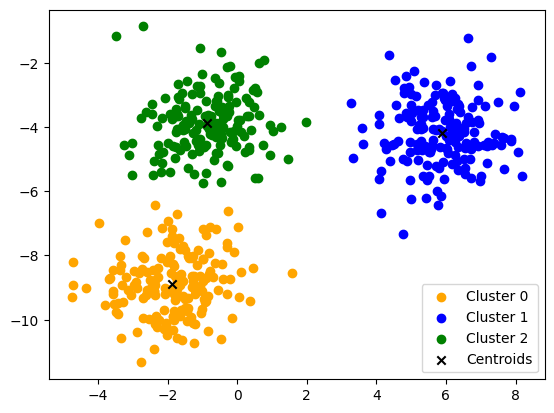

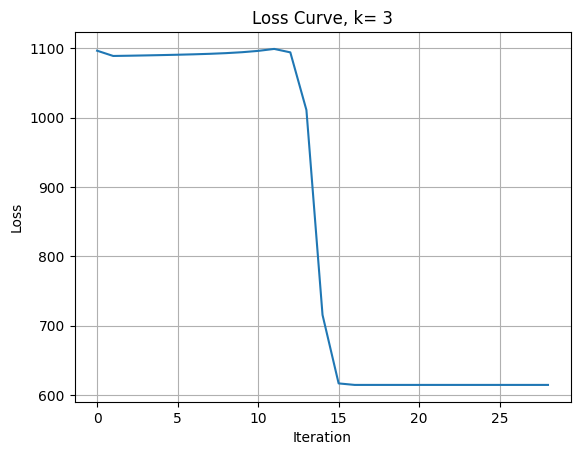

In [2]:
# Testing
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
clusters = len(np.unique(y))
k = SoftKMeans(k=3, max_iter=150,beta=5)
k.train(X,True)

Iteration:  0 loss:  409.9140307714072
Iteration:  1 loss:  343.2498723307768
Iteration:  2 loss:  327.40353095018054
Iteration:  3 loss:  323.594497410831
Iteration:  4 loss:  322.37940377898883
Iteration:  5 loss:  321.9018312084412
Iteration:  6 loss:  321.6914586382349
Iteration:  7 loss:  321.5915679043583
Iteration:  8 loss:  321.5412191691151
Iteration:  9 loss:  321.5144655934973
Iteration:  10 loss:  321.4995676063454
Iteration:  11 loss:  321.4909362764952
Iteration:  12 loss:  321.485775685363
Iteration:  13 loss:  321.48261641290685
Iteration:  14 loss:  321.48064924819454
Iteration:  15 loss:  321.4794098699724
Iteration:  16 loss:  321.4786227749057
Iteration:  17 loss:  321.4781202524752
Iteration:  18 loss:  321.4777982923155
Iteration:  19 loss:  321.47759154410545
Iteration:  20 loss:  321.4774585821028
Iteration:  21 loss:  321.4773729902342
Iteration:  22 loss:  321.47731785759055
Iteration:  23 loss:  321.47728233042614
Iteration:  24 loss:  321.4772594309474
Itera

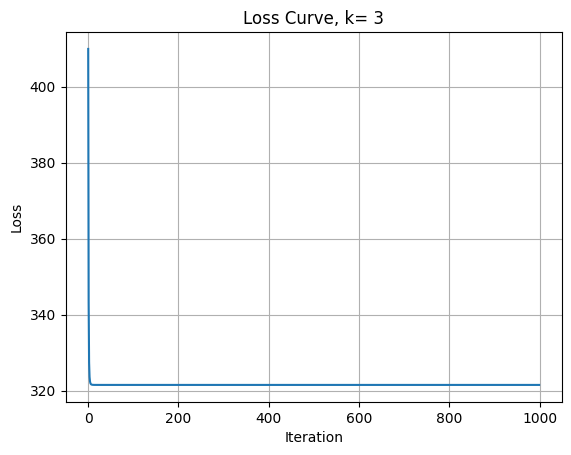

accuracy:
0.7166198557361053


In [3]:
seeds=np.loadtxt('seeds_dataset.txt')
seeds_input=seeds[:,:-1]
seeds_label=seeds[:,-1]
k=SoftKMeans(k=3,max_iter=1000,beta=2)
k.train(seeds_input)
from sklearn.metrics import adjusted_rand_score
print('accuracy:')
print(adjusted_rand_score(seeds_label, k.labels))

Iteration:  0 loss:  5883291.307517183
Iteration:  1 loss:  5366602.022534722
Iteration:  2 loss:  5312071.914704117
Iteration:  3 loss:  5295700.572375381
Iteration:  4 loss:  5284044.167640902
Iteration:  5 loss:  5276699.218552462
Iteration:  6 loss:  5271124.687768598
Iteration:  7 loss:  5263903.79239107
Iteration:  8 loss:  5243834.420332852
Iteration:  9 loss:  5191722.078949129
Iteration:  10 loss:  5146278.77663533
Iteration:  11 loss:  5092783.843532551
Iteration:  12 loss:  5030426.93738073
Iteration:  13 loss:  4999221.651985883
Iteration:  14 loss:  4988961.462048711
Iteration:  15 loss:  4986180.416365051
Iteration:  16 loss:  4985806.075721753
Iteration:  17 loss:  4986065.486462973
Iteration:  18 loss:  4987665.508728088
Iteration:  19 loss:  4990417.297888452
Iteration:  20 loss:  4992755.036767702
Iteration:  21 loss:  4995784.866135784
Iteration:  22 loss:  4997302.651190911
Iteration:  23 loss:  4998332.260959503
Iteration:  24 loss:  4998511.030061898
Iteration:  2

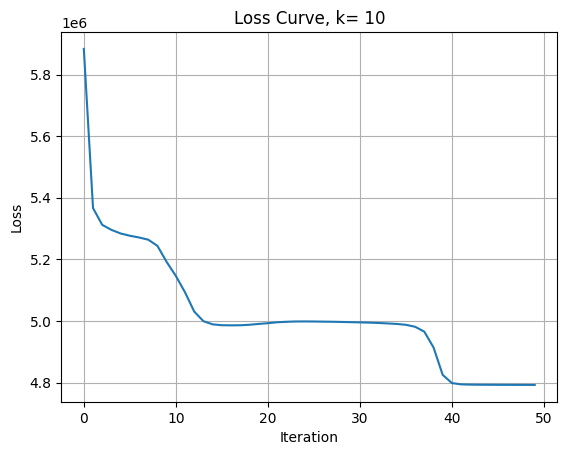

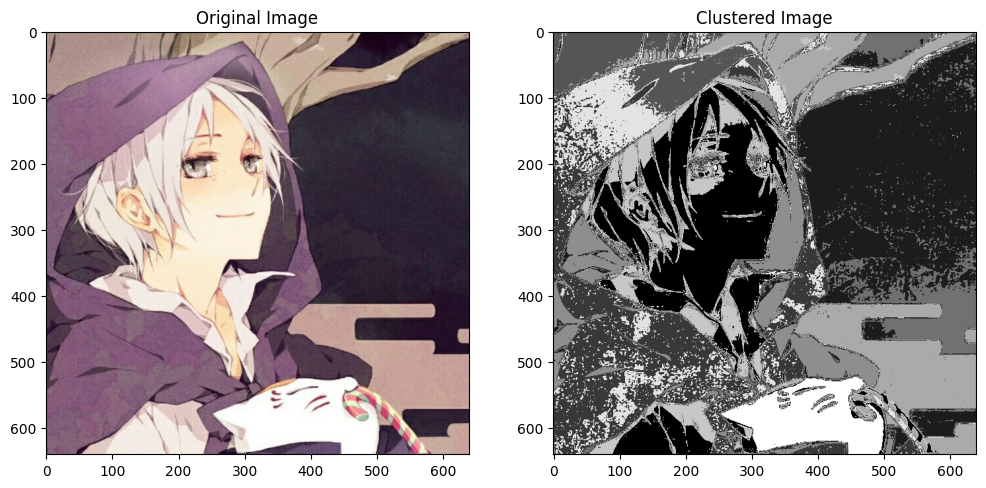

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image=Image.open('p1.jpg')
image=np.array(image)
height, width, channels = image.shape
flattened_image = image.reshape((height * width, channels))
k = 10  # Set your desired number of clusters
max_iter = 50
soft_kmeans = SoftKMeans(k=k, max_iter=max_iter, beta=6.5)

# Train SoftKMeans on the flattened image
soft_kmeans.train(flattened_image, plot=False)

# Reshape the results back to the shape of the original image
clustered_labels = soft_kmeans.labels.reshape((height, width))

# Visualize the original image and clustered image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Clustered Image
plt.subplot(1, 2, 2)
plt.imshow(clustered_labels, cmap='gray')  # Choose a colormap that suits your needs
plt.title("Clustered Image")

plt.show() 

Add non-local split-and-merge moves

Iteration:  0 loss:  359.21409095176665
Iteration:  1 loss:  315.9296172895787
Iteration:  2 loss:  304.7606156141984
Iteration:  3 loss:  313.4185327975844
Iteration:  4 loss:  308.9842020158373
Iteration:  5 loss:  298.7864715185901
Iteration:  6 loss:  310.78389561326856
Iteration:  7 loss:  312.1077793475985
Iteration:  8 loss:  317.27661857180743
Iteration:  9 loss:  313.3717468598595


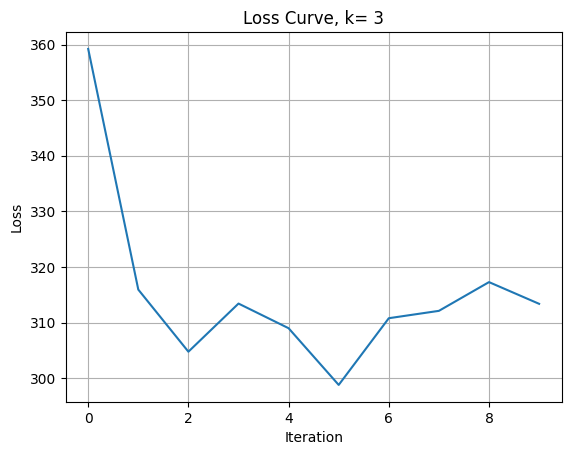

accuracy:
0.5950747559920553


In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Modify the algorithm by adding non-local split-and-merge moves
class NLSM_SoftKMeans:
    def __init__(self,k,max_iter,beta=0.01,split_threshold=1,merge_threshold=1):
        self.beta=beta
        self.k=k
        self.max_iter=max_iter
        self.split_threshold=split_threshold
        self.merge_threshold=merge_threshold
        
    def init_center(self, X, k):
        n, _ = X.shape
        center = np.zeros((k, X.shape[1]))
        idx = np.random.choice(n)
        center[0] = X[idx]
        for i in range(1, k):
            D = np.min([np.linalg.norm(X - c, axis=1)**2 for c in center[:i]], axis=0)
            probs = D / np.sum(D)
            idx = np.random.choice(n, p=probs)
            center[i] = X[idx]
        return center
        
    def train(self,X,plot=False):
        losses=[]
        n,_=X.shape
        self.center=self.init_center(X,self.k)
        for _ in range (self.max_iter):
            last_center=self.center
            self.r=np.zeros([n,self.k])
            for j in range(n):
                self.cluster(self.r[j],X[j])
            self.move_center(self.r,X)
            self.labels=np.argmax(self.r,axis=1)
            self.split(X)
            self.merge(X)
            losses.append(self.loss(X))
            print('Iteration: ',_,'loss: ', self.loss(X))
            if last_center.shape==self.center.shape:
                if np.sum((last_center-self.center)**2)==0:
                    break
        if plot:
            self.plot_cluster(X)
        iter=np.arange(len(losses))
        plt.plot(iter,losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        title='Loss Curve, k= '+str(self.k)
        plt.title(title)
        plt.grid()
        plt.show()
    
    def split(self,X):
        n=X.shape[0]
        i=0
        while i < self.k:
            clstX=X[self.labels==i]
            sum_var=np.sum(np.var(clstX,axis=0))
            if sum_var>self.split_threshold:
                self.k+=1
                center=self.init_center(clstX,2)
                self.center=np.delete(self.center,i,axis=0)
                self.center=np.insert(self.center,i,center,axis=0)
                for _ in range(self.max_iter):
                    last_center=self.center
                    self.r=np.zeros([n,self.k])
                    for j in range(n):
                        self.cluster(self.r[j],X[j])
                    self.move_center(self.r,X)
                    self.labels=np.argmax(self.r,axis=1)
                    if np.sum((last_center-self.center)**2)==0:
                        break
                i+=1
            i+=1
    
    def merge(self,X):
        n=X.shape[0]
        i=0
        while i < self.k:
            clustX1=X[self.labels==i]
            j=i+1
            while j < self.k:
                if self.distance(self.center[i],self.center[j])<self.merge_threshold:
                    clustX2=X[self.labels==j]
                    self.k-=1
                    clustX1=np.concatenate((clustX1,clustX2),axis=0)
                    center=np.mean(clustX1,axis=0)
                    self.center=np.delete(self.center,j,axis=0)
                    self.center=np.delete(self.center,i,axis=0)
                    self.center=np.insert(self.center,i,center,axis=0)
                    for k in range(n):
                        if j==np.argmax(self.r[k]):
                            self.r[k,i]=1
                    self.r=np.delete(self.r,j,axis=1)
                    self.labels=np.argmax(self.r,axis=1)
                    j-=1
                j+=1
            i+=1
        
    def distance(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    
    def cluster(self,r,x):
        dis=np.empty(self.k)
        for i in range(self.k):
            dis[i]=self.distance(x,self.center[i])
        den=np.sum(np.exp(-self.beta*dis))
        for i in range(self.k):
            r[i]=np.exp(-self.beta*dis[i])/den
    
    def move_center(self,r,X):
        self.center=np.dot(r.T,X)/np.sum(r,axis=0).reshape(-1,1)
        
    def plot_cluster(self, X):
        colors = ['orange', 'blue', 'green', 'red', 'purple', 'yellow', 'brown', 'pink', 'gray', 'olive'] 
        for i in range(self.k):
            plt.scatter(X[self.labels == i, 0], X[self.labels == i, 1], c=colors[i], label='Cluster {}'.format(i))
        plt.scatter(self.center[:,0], self.center[:,1], c='black', marker='x', label='Centroids')
        plt.legend()
        plt.show()
    
    def loss(self,X):
        n=X.shape[0]
        loss=0
        for i in range(n):
            for j in range(self.k):
                loss+=self.r[i,j]*self.distance(X[i],self.center[j])
        return loss
# Test the NLSM_SoftKMeans algorithm
seeds=np.loadtxt('seeds_dataset.txt')
seeds_input=seeds[:,:-1]
seeds_label=seeds[:,-1]
k=NLSM_SoftKMeans(k=10,max_iter=10,beta=2,split_threshold=1,merge_threshold=3)
k.train(seeds_input)
from sklearn.metrics import adjusted_rand_score
print('accuracy:')
print(adjusted_rand_score(seeds_label, k.labels))